In [672]:
#Importamos librerías
import numpy as np # data arrays
import pandas as pd # data structure and data analysis
import matplotlib.pyplot as plt # data visualization
import datetime as dt # date time
import seaborn as sns # data visualization
from sklearn.linear_model import LinearRegression # regression
from sklearn.model_selection import train_test_split # test and training

In [673]:
#Abrimos archivo 
df_airbnb = pd.read_csv("airbnb-listings.csv", sep=";")

In [674]:
#Contamos cuántas columnas y filas tiene el dataset
print('Columnas : ', len(df_airbnb.columns))
print('Filas    : ', len(df_airbnb.index))

Columnas :  89
Filas    :  14780


In [675]:
df_airbnb.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,14712301,https://www.airbnb.com/rooms/14712301,20170304065726,2017-03-04,Cozy Studio between Earls Court and Gloucester Rd,Located 1 minute away from Earls Court. It is ...,NaN,Located 1 minute away from Earls Court. It is ...,none,NaN,...,9.0,9.0,10.0,NaN,NaN,strict,1.0,0.34,"51.492474020220754, -0.18862840099442768","Host Has Profile Pic,Host Identity Verified"
1,12884849,https://www.airbnb.com/rooms/12884849,20170304065726,2017-03-05,Five bedroom house in Barnes,Lovely and spacious Edwardian house located on...,The house is spacious with approx 225 sq. of l...,Lovely and spacious Edwardian house located on...,none,Quiet residential street,...,10.0,10.0,9.0,NaN,NaN,moderate,2.0,0.76,"51.482004616612734, -0.23927746504041247","Host Has Profile Pic,Is Location Exact"
2,17524980,https://www.airbnb.com/rooms/17524980,20170304065726,2017-03-05,"Modern & Bright, Central Soho, 1 Bedroom Apart...",A nice compact one bedroom apartment that has ...,One Bedroom Apartment - Bedroom (Double Bed 14...,A nice compact one bedroom apartment that has ...,none,"Central Soho. Oxford Street, Berwick Street, C...",...,NaN,NaN,NaN,NaN,NaN,strict,10.0,NaN,"51.515792312783674, -0.13633211502639955","Host Has Profile Pic,Host Identity Verified,In..."
3,3150371,https://www.airbnb.com/rooms/3150371,20170407214119,2017-04-08,Double room + bathroom - La Latina,"Double room with own bathroom in La Latina, in...",The apartment is spacious and cozy. It is 90 m...,"Double room with own bathroom in La Latina, in...",none,La Latina is one of the most famous neighbourh...,...,10.0,10.0,10.0,NaN,NaN,flexible,1.0,2.33,"40.41010608050749, -3.714754034177323","Host Has Profile Pic,Host Identity Verified,Is..."
4,3378181,https://www.airbnb.com/rooms/3378181,20170407214119,2017-04-08,"Ópera/Plz Mayor -- A/C, elevator",Old world charm meets modern comfort in our ne...,"Designed with the traveler in mind, our one-be...",Old world charm meets modern comfort in our ne...,none,The neighborhood is steeped in history and clo...,...,10.0,10.0,10.0,NaN,NaN,strict,2.0,2.69,"40.416968822636726, -3.7094389211089993","Host Has Profile Pic,Host Identity Verified,Is..."


In [676]:
#Imprimimos todas las columnas en formato lista
print(df_airbnb.columns.tolist())

['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count', 'Host Total Listings Count', 'Host Verifications', 'Street', 'Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', 'Max

In [677]:
#Sumamos los valores nulos que tienen cada una de las columnas
missing_values_count = df_airbnb.isnull().sum()
missing_values_count

ID                                   0
Listing Url                          0
Scrape ID                            0
Last Scraped                         0
Name                                 1
                                  ... 
Cancellation Policy                  0
Calculated host listings count       4
Reviews per Month                 3162
Geolocation                          0
Features                             1
Length: 89, dtype: int64

In [678]:
#Ordenamos de mayor a menor las columnas con más valores nulos
missing_values_count.sort_values(ascending=False)

Has Availability        14768
Host Acceptance Rate    14741
Jurisdiction Names      14553
License                 14431
Square Feet             14182
                        ...  
Minimum Nights              0
Extra People                0
Guests Included             0
Room Type                   0
ID                          0
Length: 89, dtype: int64

In [679]:
#Devuelve True si la suma de valores nulos es mayor a 1000
missing_values_count>1000

ID                                False
Listing Url                       False
Scrape ID                         False
Last Scraped                      False
Name                              False
                                  ...  
Cancellation Policy               False
Calculated host listings count    False
Reviews per Month                  True
Geolocation                       False
Features                          False
Length: 89, dtype: bool

In [680]:
#Obtenemos las columnas cuya suma de valores nulos es mayor a 1000
nulldata = df_airbnb.isnull().sum()
print(nulldata[nulldata > 1000].sort_values(ascending=False))

Has Availability                14768
Host Acceptance Rate            14741
Jurisdiction Names              14553
License                         14431
Square Feet                     14182
Monthly Price                   11219
Weekly Price                    11190
Notes                            9136
Security Deposit                 8524
Interaction                      6552
Access                           6462
Cleaning Fee                     6093
Transit                          5714
Neighborhood Overview            5646
Host About                       5241
Neighbourhood                    5229
House Rules                      5161
Space                            3892
Host Neighbourhood               3876
Review Scores Value              3341
Review Scores Location           3340
Review Scores Checkin            3337
Review Scores Accuracy           3326
Review Scores Cleanliness        3320
Review Scores Communication      3320
Review Scores Rating             3304
Last Review 

Eliminamos las columnas con más de 7390 valores nulos, es decir, con más del 50% de datos nulos (no representativas).

In [681]:
null_variables = ['Has Availability', 'Host Acceptance Rate', 'Jurisdiction Names', 'License', 'Square Feet', 'Monthly Price', 'Weekly Price', 'Notes','Security Deposit']
df_airbnb.drop(null_variables, axis=1, inplace=True)

In [682]:
# Otra variable poco representativa con casi la totalidad de valores "none" (14763) es 'Experiences Offered'
df_airbnb['Experiences Offered'].value_counts()
# También la eliminamos
df_airbnb.drop('Experiences Offered', axis=1, inplace=True)

A pesar de que el dataset es de Madrid podemos observar como hay otros paises y ciudades 

In [683]:
print(pd.unique(df_airbnb["Country"]))

print(pd.unique(df_airbnb["City"]))

['United Kingdom' 'Spain' 'United States' 'Canada' 'Switzerland'
 'Hong Kong' 'Cuba' 'Germany' 'Belgium' 'Netherlands' 'Italy' 'Australia'
 'Austria' 'France' 'Denmark' 'Ireland' 'Greece' nan]
['London' 'Madrid' 'Denver' 'Palma' 'Palma de Mallorca' 'Selva'
 'Balearic Islands' 'Sant Joan' 'Montréal' 'Genève' 'Tsim Sha Tsui'
 'Los Angeles' 'Cala Pi' 'Sa Pobla' 'Muro' 'Alcúdia' 'Illetes' '马德里'
 'La Habana' 'Madrid, Comunidad de Madrid, ES' 'Berlin' 'Schaerbeek'
 'Amsterdam' 'Barcelona' 'Austin' 'Antwerpen' 'Chicago' 'Roma'
 'Bondi Beach' 'Seattle' 'Woolloomooloo' 'Vienna' 'North Sydney' 'Paris'
 'Frederiksberg' 'Dublin' 'Edimburgo' 'Bruxelles' 'Copenhagen' 'Sutton'
 'Santa Maria del Camí' 'Pollença' 'Nashville' 'Bunyola'
 'Pozuelo de Alarcón' 'Provensals' 'Deià' 'Costitx' 'Campos'
 'Mile End / Bow' 'Peguera, Calvià' 'Torrenova' "Port d'Andratx"
 'Llucmajor' 'Sant Llorenç des Cardassar' 'Puerto ALCUDIA' 'Sóller'
 'Valldemossa' 'Pollensa' 'Caimari' 'Inca' '馬德里' 'Montreal' 'Brooklyn'
 'Washi

Filtramos el dataset para quedarnos solamente con aquellas filas donde City sea Madrid y Country Spain

In [684]:
df_airbnb = df_airbnb[(df_airbnb['City'] == "Madrid") & (df_airbnb['Country'] == 'Spain')]

print(pd.unique(df_airbnb["Country"]))
print(pd.unique(df_airbnb["City"]))


['Spain']
['Madrid']


Eliminamos las columnas que poseen información redundante sobre la localización.
- Por ejemplo, "Smart Location", "State" o "Country Code" porque ya tenemos "City" y "Country".
- También "Geolocation" porque ya tenemos "Latitude" y "Longitud".

La columna "Country" la mantememos por si en el futuro se quisiera añadir información de otros países como Alemania o Suiza.

In [685]:
location_variables = ['Smart Location', 'State', 'Country Code', 'Geolocation']
df_airbnb.drop(location_variables, axis=1,inplace=True)

Identificamos y eliminamos las columnas que contienen URLs

In [686]:
url_variables = df_airbnb.filter(regex="Url|url|URL")
url_variables

,Listing Url,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host URL,Host Thumbnail Url,Host Picture Url
3,https://www.airbnb.com/rooms/3150371,https://a0.muscache.com/im/pictures/40713802/3...,https://a0.muscache.com/im/pictures/40713802/3...,https://public.opendatasoft.com/api/explore/v2...,https://a0.muscache.com/im/pictures/40713802/3...,https://www.airbnb.com/users/show/11902716,https://a0.muscache.com/im/users/11902716/prof...,https://a0.muscache.com/im/users/11902716/prof...
4,https://www.airbnb.com/rooms/3378181,https://a0.muscache.com/im/pictures/44239584/c...,https://a0.muscache.com/im/pictures/44239584/c...,https://public.opendatasoft.com/api/explore/v2...,https://a0.muscache.com/im/pictures/44239584/c...,https://www.airbnb.com/users/show/809083,https://a0.muscache.com/im/users/809083/profil...,https://a0.muscache.com/im/users/809083/profil...
5,https://www.airbnb.com/rooms/2070750,https://a0.muscache.com/im/pictures/84378550/f...,https://a0.muscache.com/im/pictures/84378550/f...,https://public.opendatasoft.com/api/explore/v2...,https://a0.muscache.com/im/pictures/84378550/f...,https://www.airbnb.com/users/show/7005367,https://a0.muscache.com/im/users/7005367/profi...,https://a0.muscache.com/im/users/7005367/profi...
6,https://www.airbnb.com/rooms/9832499,https://a0.muscache.com/im/pictures/be441d1f-4...,https://a0.muscache.com/im/pictures/be441d1f-4...,https://public.opendatasoft.com/api/explore/v2...,https://a0.muscache.com/im/pictures/be441d1f-4...,https://www.airbnb.com/users/show/1647109,https://a0.muscache.com/im/pictures/49fd9f5c-0...,https://a0.muscache.com/im/pictures/49fd9f5c-0...
7,https://www.airbnb.com/rooms/1868170,https://a0.muscache.com/im/pictures/c232f016-f...,https://a0.muscache.com/im/pictures/c232f016-f...,https://public.opendatasoft.com/api/explore/v2...,https://a0.muscache.com/im/pictures/c232f016-f...,https://www.airbnb.com/users/show/9738650,https://a0.muscache.com/im/pictures/c88a555a-e...,https://a0.muscache.com/im/pictures/c88a555a-e...
...,...,...,...,...,...,...,...,...
14755,https://www.airbnb.com/rooms/14569945,https://a0.muscache.com/im/pictures/de26431e-3...,https://a0.muscache.com/im/pictures/de26431e-3...,https://public.opendatasoft.com/api/explore/v2...,https://a0.muscache.com/im/pictures/de26431e-3...,https://www.airbnb.com/users/show/36591599,https://a0.muscache.com/im/pictures/a0f9f0eb-d...,https://a0.muscache.com/im/pictures/a0f9f0eb-d...
14756,https://www.airbnb.com/rooms/11556979,https://a0.muscache.com/im/pictures/e8b44f30-e...,https://a0.muscache.com/im/pictures/e8b44f30-e...,https://public.opendatasoft.com/api/explore/v2...,https://a0.muscache.com/im/pictures/e8b44f30-e...,https://www.airbnb.com/users/show/61033459,https://a0.muscache.com/im/pictures/6c695b7a-c...,https://a0.muscache.com/im/pictures/6c695b7a-c...
14757,https://www.airbnb.com/rooms/707670,https://a0.muscache.com/im/pictures/20174832/8...,https://a0.muscache.com/im/pictures/20174832/8...,https://public.opendatasoft.com/api/explore/v2...,https://a0.muscache.com/im/pictures/20174832/8...,https://www.airbnb.com/users/show/3540591,https://a0.muscache.com/im/users/3540591/profi...,https://a0.muscache.com/im/users/3540591/profi...
14758,https://www.airbnb.com/rooms/13648498,https://a0.muscache.com/im/pictures/e416b03c-c...,https://a0.muscache.com/im/pictures/e416b03c-c...,https://public.opendatasoft.com/api/explore/v2...,https://a0.muscache.com/im/pictures/e416b03c-c...,https://www.airbnb.com/users/show/3566146,https://a0.muscache.com/im/pictures/20deba33-a...,https://a0.muscache.com/im/pictures/20deba33-a...


In [687]:
# Eliminamos URLs
df_airbnb.drop(url_variables,axis=1,inplace=True)

Eliminamos otras variables:

- "Scrape ID" porque es el mismo para todos los alojamientos
- "Last Scraped" tiene la misma fecha '2017-04-08'
- "Name", "Summary", "Space" y "Description" porque contienen información textual que se puede extraer de otras columnas (como Street, Bedrooms, etc.)
- "Neighborhood Overview", "Transit", "Access", "Interaction", "House Rules" porque contienen más de 4000 valores nulos cada una y sus descripciones en texto son difícilmente procesables para obtener información útil para nuestro estudio
- "Neighbourhood" porque contiene más de 4000 nulos y podemos utilizar los datos limpios de "Neighbourhood Cleansed" y "Neighbourhood Group Cleansed"
- "Market" porque se trata mayoritariamente de "Madrid", no nos aporta información útil
- "Extra People" porque la mayoría de los datos (6637 filas) poseen 0 personas extra y "Accommodates" ya nos proporciona información sobre el número total de personas que se pueden hospedar por alojamiento.
- "Cleaning Fee" porque contiene un número elevado de nulos (5387)
- "Calendar Updated", "Availability 30", "Availability 60", "Availability 90", "Availability 365" porque consideramos que estos datos sujetos a actualizaciones diarias no contienen información relevante para nuestro estudio
- "Calendar last Scraped" solo contiene dos fechas (2017-04-08, 2017-04-07)
- "First Review" y "Last Review" porque contienen un número elevado de valores nulos (más de 2700)
- "Review Scores Rating", "Review Scores Accuracy", "Review Scores Cleanliness","Review Scores Checkin","Review Scores Communication","Review Scores Location","Review Scores Value" y "Reviews per Month" y "Features" no las consideramos relevantes para nuestro estudio.


In [688]:
not_useful_variables = ['Scrape ID', 'Last Scraped', 'Name', 'Summary','Space','Description','Neighborhood Overview','Transit','Access','Interaction','House Rules',
                        'Neighbourhood','Market','Extra People','Calendar Updated', 'Cleaning Fee', 'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365',
                        'Calendar last Scraped','First Review', 'Last Review','Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication', 
                        'Review Scores Location','Review Scores Value','Reviews per Month', 'Features']
df_airbnb.drop(not_useful_variables,axis=1,inplace=True)

Columnas con información sobre el Host que no consideramos para nuestros estudio:
- "Host About" porque contiene más de 4000 nulos y sus descripciones en texto son difícilmente procesables para obtener información útil
- "Host Neighbourhood" porque contiene más de 3000 nulos, realmente nos interesa el Neighbourhood del alojamiento y ya tenemos información sobre la localización general del Host en "Host Location"
- "Host Listings Count" y "Host Total Listings Count" porque para poder conocer la experiencia del host o distinguir si se trata de una empresa o de un individuo ya contamos con la columna "Calculated host listings count"
- "Host Response Time" y "Host Response Rate" porque contienen un elevado número de valores nulos cada una (1655)
- "Host Verifications"

In [689]:
host_variables = ['Host About', 'Host Neighbourhood', 'Host Listings Count','Host Total Listings Count', 'Host Response Time','Host Response Rate', 'Host Verifications']
df_airbnb.drop(host_variables, axis=1,inplace=True)

In [690]:
#Contamos nuevamente cuántas columnas y filas tiene el df
print('Columnas : ', len(df_airbnb.columns))
print('Filas    : ', len(df_airbnb.index))

Columnas :  28
Filas    :  13207


In [691]:
# #Creamos un nuevo df donde seleccionamos las columnas cuyos valores sean compatibles con lo que queremos estudiar

# df = df_airbnb[['ID','Host ID', 'Host Since', 'Host Name', 'Street', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 
#                 'Country', 'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type',
#                 'Price','Number of Reviews', 'Cancellation Policy', 'Geolocation']]


## PARAMOS AQUI PARA EL DATAWAREHOUSE

Revisión de columnas

In [692]:
#Número de nulos en las columnas seleccionadas
missing_values_count_2 = df_airbnb.isnull().sum().sort_values(ascending=False)
missing_values_count_2

#Otra forma con el mismo resultado: df.isna().sum().sort_values(ascending=False) 

Zipcode                           439
Amenities                         107
Bathrooms                          49
Beds                               49
Host Location                      42
Bedrooms                           23
Price                               9
Host Name                           3
Host Since                          3
ID                                  0
Cancellation Policy                 0
Number of Reviews                   0
Maximum Nights                      0
Minimum Nights                      0
Guests Included                     0
Bed Type                            0
Room Type                           0
Accommodates                        0
Host ID                             0
Property Type                       0
Longitude                           0
Latitude                            0
Country                             0
City                                0
Neighbourhood Group Cleansed        0
Neighbourhood Cleansed              0
Street      

In [693]:
#Cambiamos los 9 valores null de la columna 'Price' por el valor del precio promedio 
for i in df_airbnb['Price']:
	df_airbnb['Price'] = df_airbnb['Price'].fillna(df_airbnb['Price'].mean())


In [694]:
df_airbnb.isnull().sum().sort_values(ascending=False)

Zipcode                           439
Amenities                         107
Bathrooms                          49
Beds                               49
Host Location                      42
Bedrooms                           23
Host Name                           3
Host Since                          3
ID                                  0
Cancellation Policy                 0
Number of Reviews                   0
Maximum Nights                      0
Minimum Nights                      0
Guests Included                     0
Price                               0
Bed Type                            0
Room Type                           0
Accommodates                        0
Host ID                             0
Property Type                       0
Longitude                           0
Latitude                            0
Country                             0
City                                0
Neighbourhood Group Cleansed        0
Neighbourhood Cleansed              0
Street      

In [695]:
# #Creamos nuevo dataframe con los valores NaN eliminados
df = df_airbnb.dropna()


In [696]:
# # Calculamos columnas y filas
print('Columnas : ', len(df.columns))
print('Filas    : ', len(df.index))

Columnas :  28
Filas    :  12575


In [697]:
# #Verificamos que la suma de nulls en todas las columnas sea 0
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values

ID                                0
Host ID                           0
Cancellation Policy               0
Number of Reviews                 0
Maximum Nights                    0
Minimum Nights                    0
Guests Included                   0
Price                             0
Amenities                         0
Bed Type                          0
Beds                              0
Bedrooms                          0
Bathrooms                         0
Accommodates                      0
Room Type                         0
Property Type                     0
Longitude                         0
Latitude                          0
Country                           0
Zipcode                           0
City                              0
Neighbourhood Group Cleansed      0
Neighbourhood Cleansed            0
Street                            0
Host Location                     0
Host Since                        0
Host Name                         0
Calculated host listings cou

In [698]:
df["Host Since"]

3        2014-02-03
4        2011-07-12
7        2013-10-31
8        2014-05-08
9        2014-05-08
            ...    
14755    2015-06-24
14756    2016-03-01
14757    2012-09-11
14758    2012-09-14
14759    2013-01-03
Name: Host Since, Length: 12575, dtype: object

In [699]:
#Convertimos Host Since a dtype datatime64  
df["Host Since"] = pd.to_datetime(df["Host Since"], format="%Y/%m/%d")

# print the first 5 rows of "ActivityDate" to confirm
#airbnb["Host Since"].head()

C:\Users\Carla\AppData\Local\Temp\ipykernel_13884\832039769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Host Since"] = pd.to_datetime(df["Host Since"], format="%Y/%m/%d")


In [700]:
#Los vecindarios son una de las variables clave en nuestro proyecto
#Vemos los vecindarios que hay en nuestro dataset
df['Neighbourhood Cleansed'].unique()

array(['Palacio', 'Embajadores', 'Cortes', 'Justicia', 'Universidad',
       'Sol', 'Imperial', 'Acacias', 'Ventas', 'Pueblo Nuevo', 'Quintana',
       'Concepción', 'Canillas', 'Pinar del Rey', 'San Andrés',
       'Arapiles', 'Trafalgar', 'Almagro', 'Chopera', 'Legazpi',
       'Delicias', 'Palos de Moguer', 'Prosperidad', 'Hispanoamérica',
       'Nueva España', 'Castilla', 'Bellas Vistas', 'Cuatro Caminos',
       'Vallehermoso', 'Almenara', 'Valdeacederas', 'Berruguete',
       'Gaztambide', 'Guindalera', 'Lista', 'Castellana', 'El Viso',
       'Recoletos', 'Goya', 'Fuente del Berro', 'Atocha', 'Pacífico',
       'Adelfas', 'Ibiza', 'Jerónimos', 'Rios Rosas', 'Peñagrande',
       'Argüelles', 'Puerta del Angel', 'Lucero', 'Aluche', 'Campamento',
       'Aguilas', 'Comillas', 'Vista Alegre', 'La Paz', 'Valverde',
       'Casa de Campo', 'Numancia', 'Puerta Bonita', 'Buenavista',
       'Abrantes', 'Moscardó', 'Entrevías', 'San Diego',
       'Palomeras Sureste', 'Fontarrón', 'Vina

In [701]:
#En total son 125 vecindarios
len(df['Neighbourhood Cleansed'].unique())

125

In [702]:
#El nombre de los vecindarios los cambiamos a mayúsculas
df['Neighbourhood Cleansed'] = df['Neighbourhood Cleansed'].str.upper()

df.head()

C:\Users\Carla\AppData\Local\Temp\ipykernel_13884\3117930092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Neighbourhood Cleansed'] = df['Neighbourhood Cleansed'].str.upper()


,ID,Host ID,Host Name,Host Since,Host Location,Street,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,Zipcode,...,Beds,Bed Type,Amenities,Price,Guests Included,Minimum Nights,Maximum Nights,Number of Reviews,Cancellation Policy,Calculated host listings count
3,3150371,11902716,Daniel Y Ximena,2014-02-03,"Madrid, Community of Madrid, Spain","Palacio, Madrid, Community of Madrid 28005, Spain",PALACIO,Centro,Madrid,28005,...,1.0,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Doorman,...",36.0,1,2,1125,80,flexible,1.0
4,3378181,809083,Michael,2011-07-12,"Madrid, Madrid, Spain","Palacio, Madrid, Community of Madrid 28013, Spain",PALACIO,Centro,Madrid,28013,...,1.0,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,...",85.0,1,3,1125,90,strict,2.0
7,1868170,9738650,Carlos Chamarro,2013-10-31,"Madrid, Community of Madrid, Spain","Palacio, Madrid, Community of Madrid 28005, Spain",PALACIO,Centro,Madrid,28005,...,4.0,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Pets all...",190.0,6,3,1125,46,moderate,1.0
8,6554204,15258781,Erasmo´S,2014-05-08,"Madrid, Community of Madrid, Spain","Palacio, Madrid, Comunidad de Madrid 28013, Spain",PALACIO,Centro,Madrid,28013,...,1.0,Real Bed,"Wireless Internet,Kitchen,Smoking allowed,Door...",30.0,1,10,1125,3,strict,97.0
9,3861249,15258781,Erasmo´S,2014-05-08,"Madrid, Community of Madrid, Spain","Embajadores, Madrid, Community of Madrid 28012...",EMBAJADORES,Centro,Madrid,28012,...,1.0,Real Bed,"Wireless Internet,Kitchen,Smoking allowed,Door...",18.0,1,10,1125,0,strict,97.0


In [703]:
# Quitamos los acentos de los nombres de los vecindarios

df['Neighbourhood Cleansed'] = df['Neighbourhood Cleansed'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df['Neighbourhood Cleansed'].unique()

C:\Users\Carla\AppData\Local\Temp\ipykernel_13884\1070464978.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Neighbourhood Cleansed'] = df['Neighbourhood Cleansed'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')


array(['PALACIO', 'EMBAJADORES', 'CORTES', 'JUSTICIA', 'UNIVERSIDAD',
       'SOL', 'IMPERIAL', 'ACACIAS', 'VENTAS', 'PUEBLO NUEVO', 'QUINTANA',
       'CONCEPCION', 'CANILLAS', 'PINAR DEL REY', 'SAN ANDRES',
       'ARAPILES', 'TRAFALGAR', 'ALMAGRO', 'CHOPERA', 'LEGAZPI',
       'DELICIAS', 'PALOS DE MOGUER', 'PROSPERIDAD', 'HISPANOAMERICA',
       'NUEVA ESPANA', 'CASTILLA', 'BELLAS VISTAS', 'CUATRO CAMINOS',
       'VALLEHERMOSO', 'ALMENARA', 'VALDEACEDERAS', 'BERRUGUETE',
       'GAZTAMBIDE', 'GUINDALERA', 'LISTA', 'CASTELLANA', 'EL VISO',
       'RECOLETOS', 'GOYA', 'FUENTE DEL BERRO', 'ATOCHA', 'PACIFICO',
       'ADELFAS', 'IBIZA', 'JERONIMOS', 'RIOS ROSAS', 'PENAGRANDE',
       'ARGUELLES', 'PUERTA DEL ANGEL', 'LUCERO', 'ALUCHE', 'CAMPAMENTO',
       'AGUILAS', 'COMILLAS', 'VISTA ALEGRE', 'LA PAZ', 'VALVERDE',
       'CASA DE CAMPO', 'NUMANCIA', 'PUERTA BONITA', 'BUENAVISTA',
       'ABRANTES', 'MOSCARDO', 'ENTREVIAS', 'SAN DIEGO',
       'PALOMERAS SURESTE', 'FONTARRON', 'VINA

In [704]:
#Contamos el número de alojamientos por vecindario
df['Neighbourhood Cleansed'].value_counts()

EMBAJADORES       1780
UNIVERSIDAD       1309
PALACIO           1044
SOL                907
JUSTICIA           754
                  ... 
CUATRO VIENTOS       3
FUENTELAREINA        3
EL PLANTIO           3
EL GOLOSO            3
ORCASITAS            2
Name: Neighbourhood Cleansed, Length: 125, dtype: int64

In [705]:
# Nos faltaría quitar los espacios
df.columns = df.columns.str.replace('  ', ' ')

# COLUMNA ZIPCODE

In [707]:
# Lista de Zipcodes sin repetición
zipcodes = list(df['Zipcode'].unique())


# Creamos una función para limpiar los zipcodes
def zipcodes_iterator(zipcode):
    if '\r\n' in zipcode or 'Madrid' in zipcode:
        return zipcode[-5:]
    if len(zipcode) == 4:
        list_zipcode = list(zipcode)
        list_zipcode.insert(2,'0')
        return ''.join(list_zipcode)
    if len(zipcode) == 6:
        return zipcode.replace('0', '', 1)
    return zipcode

# Lista de Zipcodes limpia
zipcodes_transformed = list(map(zipcodes_iterator, zipcodes))

In [712]:
# Sustituimos valores de la antigua lista de zipcodes por la nueva lista limpia
# Nos quita zipcodes porque hay valores duplicados al hacer limpieza (pasamos de 74 a 67)

df['Zipcode'] = df['Zipcode'].replace(zipcodes, zipcodes_transformed)

len(df['Zipcode'].unique())

C:\Users\Carla\AppData\Local\Temp\ipykernel_13884\3136004413.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Zipcode'] = df['Zipcode'].replace(zipcodes, zipcodes_transformed)


67

In [714]:
df['Zipcode'].unique()

array(['28005', '28013', '28012', '28014', '28004', '28015', '28008',
       '28045', '28017', '28027', '28043', '28021', '28003', '28010',
       '28002', '28016', '28036', '28039', '28020', '28046', '28029',
       '28028', '28006', '28001', '28009', '28007', '28035', '28011',
       '28047', '28024', '28044', '28019', '28025', '28038', '28053',
       '28026', '28018', '28030', '28031', '28051', '28032', '28037',
       '28022', '28042', '28054', '28041', '28058', '28034', '28050',
       '28049', '28033', '28055', '27013', '28023', '28850', '28040',
       '20126', '28056', '28060', '20015', '27004', '28', '25008',
       '20013', '28094', '28105', '28048'], dtype=object)

In [715]:
df.drop(df[df['Zipcode']=='28'].index, inplace = True)

C:\Users\Carla\AppData\Local\Temp\ipykernel_13884\978777405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['Zipcode']=='28'].index, inplace = True)


In [717]:
pd.unique(df['Zipcode'])

array(['28005', '28013', '28012', '28014', '28004', '28015', '28008',
       '28045', '28017', '28027', '28043', '28021', '28003', '28010',
       '28002', '28016', '28036', '28039', '28020', '28046', '28029',
       '28028', '28006', '28001', '28009', '28007', '28035', '28011',
       '28047', '28024', '28044', '28019', '28025', '28038', '28053',
       '28026', '28018', '28030', '28031', '28051', '28032', '28037',
       '28022', '28042', '28054', '28041', '28058', '28034', '28050',
       '28049', '28033', '28055', '27013', '28023', '28850', '28040',
       '20126', '28056', '28060', '20015', '27004', '25008', '20013',
       '28094', '28105', '28048'], dtype=object)

In [ ]:
#Creamos un nuevo csv con el dataframe limpio pero con outliers para Tableau
df.to_csv('airbnb_clean_to_tableau.csv', index=False)

## Detección de outliers

c:\Users\Carla\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Carla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


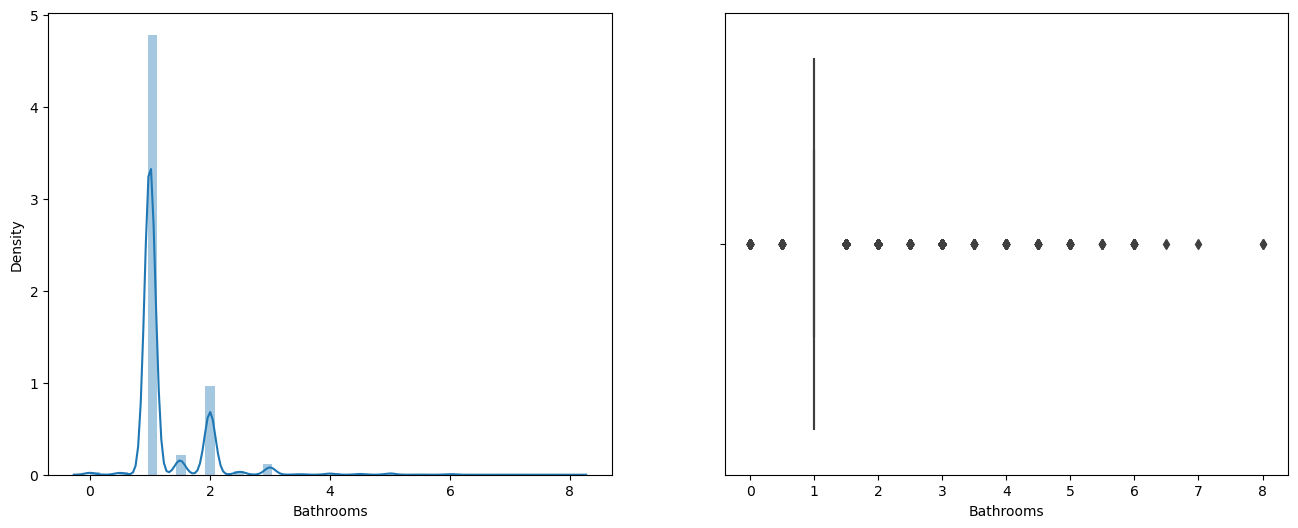

c:\Users\Carla\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Carla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


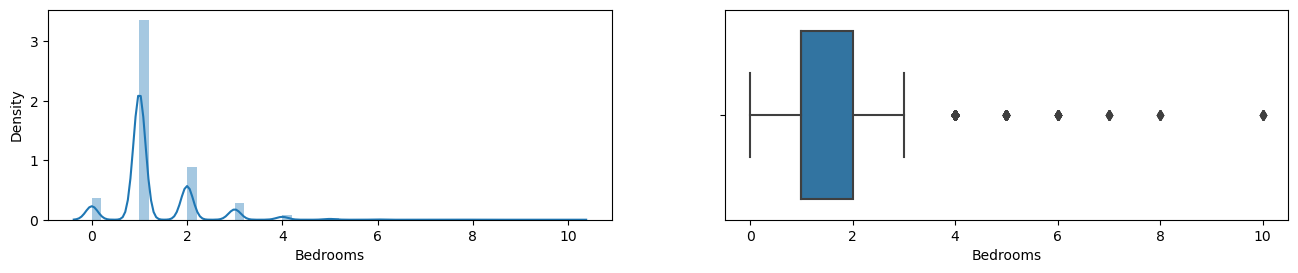

c:\Users\Carla\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Carla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


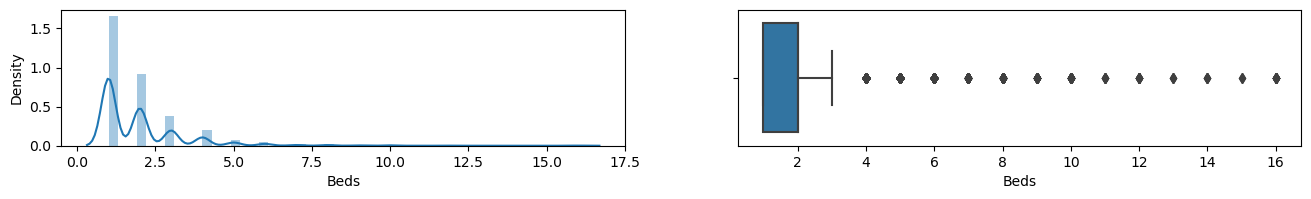

c:\Users\Carla\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Carla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


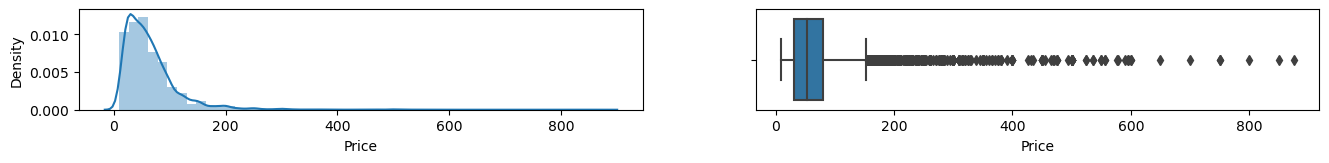

c:\Users\Carla\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Carla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


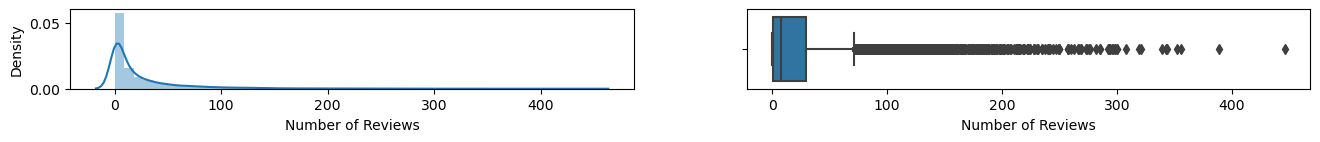

In [409]:
numeric_col = ['Bathrooms','Bedrooms','Beds', 'Price', 'Number of Reviews']

c = 1
for col in numeric_col:
    plt.figure(figsize=(16,6))
    plt.subplot(c,2,1)
    sns.distplot(df[col])
    plt.subplot(c,2,2)
    sns.boxplot(df[col])
    plt.show()
    c += 1




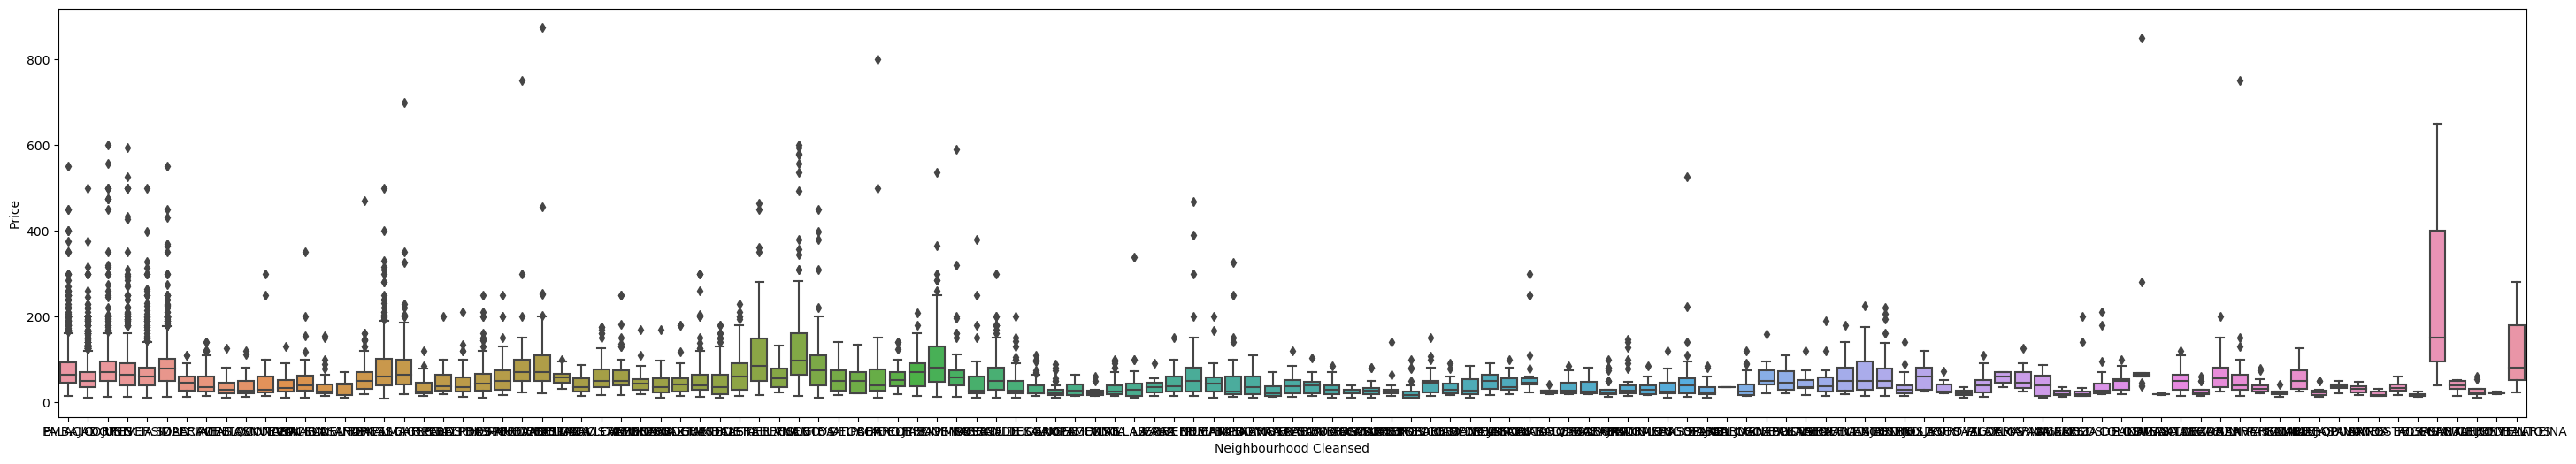

In [410]:
plt.figure(figsize=(36,6))
sns.boxplot(x = df['Neighbourhood Cleansed'], y = df['Price'])
plt.show()

In [411]:
df.groupby('Neighbourhood Cleansed')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Neighbourhood Cleansed,,,,,,,,
ABRANTES,17.0,28.647059,17.492646,12.0,15.00,20.0,38.00,70.0
ACACIAS,137.0,46.051095,28.024496,15.0,25.00,35.0,60.00,140.0
ADELFAS,46.0,58.913043,28.592793,18.0,37.25,52.5,71.00,141.0
AEROPUERTO,4.0,36.500000,11.676187,21.0,32.25,38.0,42.25,49.0
AGUILAS,13.0,25.153846,13.975253,14.0,16.00,20.0,26.00,59.0
...,...,...,...,...,...,...,...,...
VALVERDE,42.0,47.380952,29.049959,14.0,25.00,37.0,59.75,150.0
VENTAS,74.0,33.540541,18.646818,10.0,20.00,28.5,45.00,125.0
VINATEROS,15.0,34.000000,31.793980,15.0,20.00,25.0,28.50,140.0


In [412]:
df = df.dropna()

print("Old Shape: ", df.shape)
numeric_col = ['Bedrooms','Beds', 'Number of Reviews', 'Price']

for column in numeric_col:
    for x in [column]:
        q75,q25 = np.percentile(df.loc[:,x],[75,25])
        intr_qr = q75-q25
    
        max = q75+(1.7*intr_qr)
        min = q25-(1.7*intr_qr)
    
        df.loc[df[x] < min,x] = np.nan
        df.loc[df[x] > max,x] = np.nan
    df = df.dropna()


print("New Shape: ", df.shape)


Old Shape:  (12575, 28)
New Shape:  (9868, 28)


c:\Users\Carla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

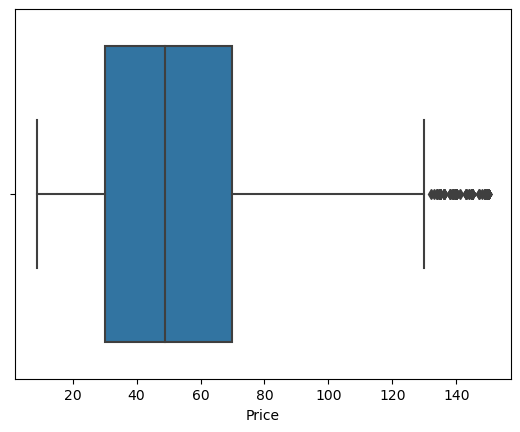

In [413]:
sns.boxplot(df['Price'])

In [414]:
# ax = df['Price'].plot.hist()
# ax.set_ylabel("frequecy")
# ax.set_xlabel("Neighbourhood")
# plt.show()

In [415]:
plt.scatter(df['Neighbourhood_Cleansed'], df['Neighbourhood Group Cleansed'])
plt.xlabel('Neighbourhood_Cleansed')
plt.grid()
plt.tight_layout()

KeyError: 'Neighbourhood_Cleansed'

In [ ]:
corr_matrix = df.corr()
print(corr_matrix)

                         ID   Host ID  Latitude  Longitude  Bathrooms  \
ID                 1.000000  0.614977  0.005033   0.015724  -0.018058   
Host ID            0.614977  1.000000 -0.015402   0.026189  -0.024873   
Latitude           0.005033 -0.015402  1.000000   0.258127   0.043424   
Longitude          0.015724  0.026189  0.258127   1.000000   0.010552   
Bathrooms         -0.018058 -0.024873  0.043424   0.010552   1.000000   
Bedrooms          -0.013134 -0.035130  0.029117   0.012661   0.425418   
Beds              -0.058868 -0.044006  0.015235  -0.023273   0.384928   
Price             -0.029744 -0.071138  0.065900  -0.026423   0.351145   
Number of Reviews -0.424614 -0.255837 -0.061343  -0.038622  -0.059453   

                   Bedrooms      Beds     Price  Number of Reviews  
ID                -0.013134 -0.058868 -0.029744          -0.424614  
Host ID           -0.035130 -0.044006 -0.071138          -0.255837  
Latitude           0.029117  0.015235  0.065900          -0.06

In [ ]:
#Creamos un nuevo csv con el dataframe limpio
df.to_csv('airbnb_clean.csv', index=False)

## Regresión lineal

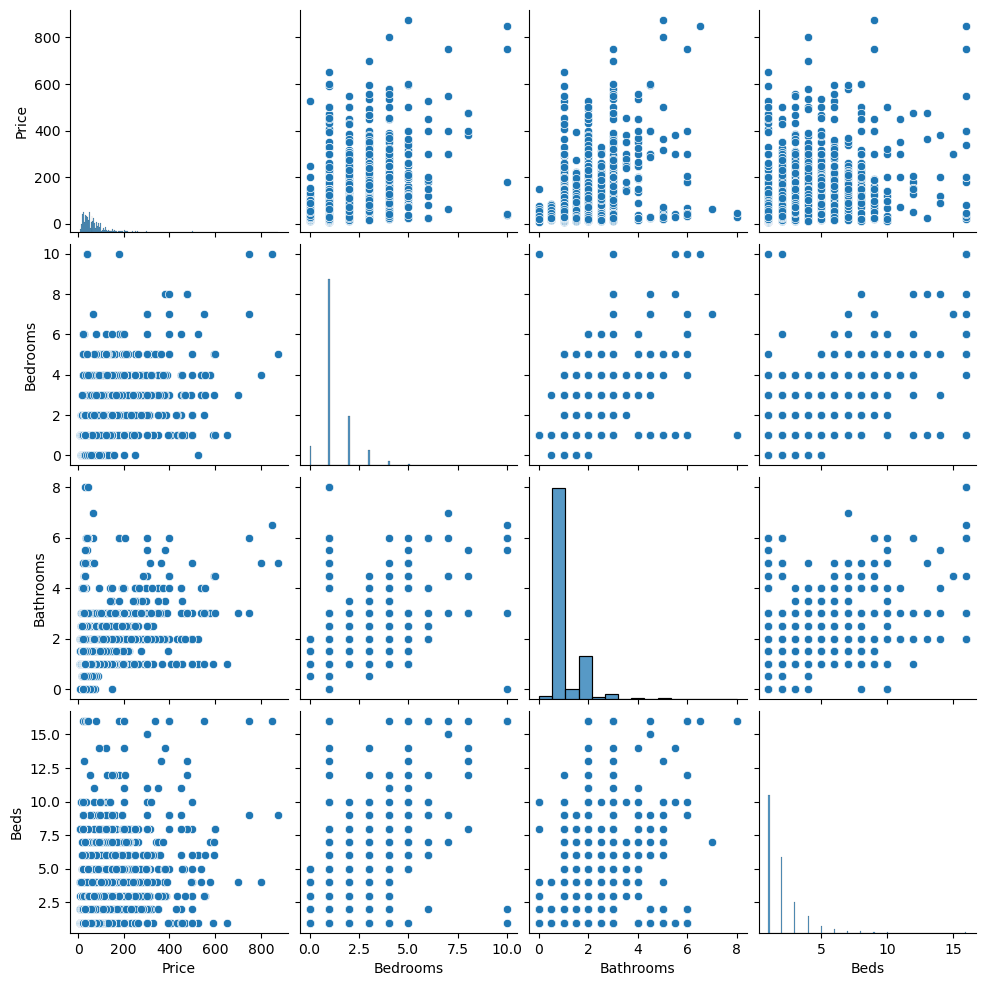

In [ ]:
sns.pairplot(df, vars=['Price', 'Bedrooms', 'Bathrooms', 'Beds'])


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    df[['Bedrooms','Bathrooms', 'Beds']],
    df['Price'],
    test_size=0.2,
    random_state=10
)

In [ ]:
multi_regression = LinearRegression()
multi_regression.fit(x_train, y_train)
multi_regression.intercept_

7.366821894599298

In [ ]:
multi_coef = pd.DataFrame(data=multi_regression.coef_, index = x_train.columns, columns = ['Coefficient'])
multi_coef

,Coefficient
Bedrooms,21.581741
Bathrooms,11.584529
Beds,8.029604


# Analysing the Estimated Values & Regression residuals 

In [ ]:
y_pred_multi = multi_regression.predict(x_test)
residuals = y_pred_multi - y_test


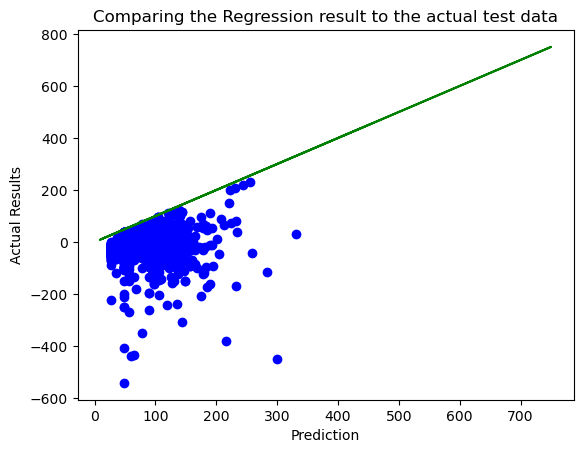

In [ ]:
plt.title('Comparing the Regression result to the actual test data')

plt.scatter(y_pred_multi, residuals, color ='b')
plt.plot( y_test, y_test, color ='g')

plt.ylabel('Actual Results')
plt.xlabel('Prediction')

plt.show()

In [ ]:
rsquared = multi_regression.score(x_train, y_train)
print(f'Training data r-squared: {rsquared:.2}')

# Sin beds da r = 0.29 se decide añadir el numero de camas

Training data r-squared: 0.31


In [ ]:
example = pd.DataFrame.from_dict({'Bedrooms':[4],'Bathrooms':[1],'Beds':[4]})
prediction = multi_regression.predict(example)[0]
print(f"According to the model, a home with 3 bedrooms, 3 beds and 1 bathroom would cost {prediction:.2f}/night")

According to the model, a home with 3 bedrooms, 3 beds and 1 bathroom would cost 137.40/night
